## Exercise 9: Neural Networks for hand-written number classification

#### About the dataset
---
Data points are 28x28 pixel images of numbers, ranging from 0-9. So there is 10 classes in total, one for each number between 1-2.
Some more info on the dataset: http://yann.lecun.com/exdb/mnist/

### Do the imports

In [1]:
import torch
import torchvision
import numpy as np
import pandas as pd

In [2]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [3]:
np.random.seed(42)

### 1. Load and split the data

In [4]:
transforms = torchvision.transforms.Compose([torchvision.transforms.ToTensor()])

train_set = torchvision.datasets.MNIST("./data", download=True,
                                       train=True, transform=transforms)
test_set = torchvision.datasets.MNIST("./data", download=False,
                                      train=False, transform=transforms)

# DataLoader: Special PyTorch object that feeds the PyTorch Neural Network with data 
batch_size = 32
train_loader = torch.utils.data.DataLoader(train_set, 
                                          batch_size=batch_size, shuffle=True)

test_loader = torch.utils.data.DataLoader(test_set, 
                                         batch_size=batch_size, shuffle=True)

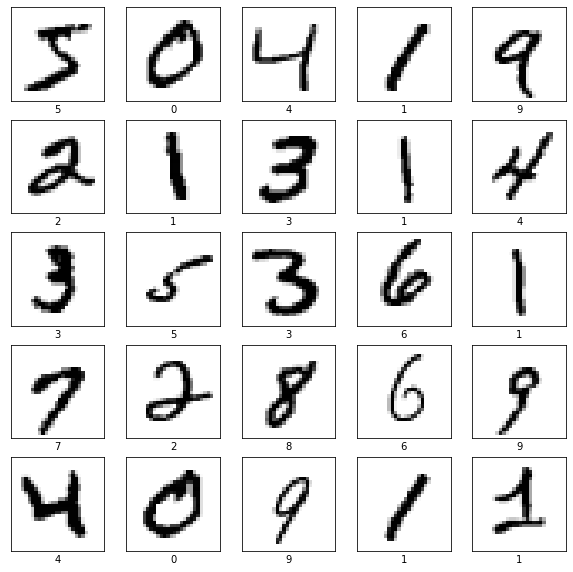

In [5]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False) 
    plt.imshow(train_set.data[i], cmap=plt.cm.binary)
    plt.xlabel(f"{train_set.targets[i]}")
plt.show()

### Assignments:
1. Implement a 2-layerd MLP(1 hidden layer + 1 output layer). Implement the MLP as a class, as done here: https://pytorch.org/tutorials/beginner/blitz/cifar10_tutorial.html .
2. Train it on the training set(see lecture implementation for it) for 100 epochs.
3. Plot test- and train accuracy(y-axis) over epochs(x-axis).
4. Try using different Hyperparameters, such as number of hidden neurons, learning rate, number of epochs 

In [6]:
class NeuralNet(torch.nn.Module):
    def __init__(self):
        super(NeuralNet, self).__init__()
        self.flatten = torch.nn.Flatten()
        self.hidden_layer = torch.nn.Linear(28*28, 120)
        self.non_linearity_1 = torch.nn.Sigmoid()
        self.output_layer = torch.nn.Linear(120, 10)

    def forward(self, x):
        x = self.flatten(x)
        x = self.hidden_layer(x)
        x = self.non_linearity_1(x)
        x = self.output_layer(x)
        return x

In [7]:
model = NeuralNet()

In [8]:
# 1. Define Loss function, and optimizer
loss_fn = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model.parameters(), lr=0.01)

In [9]:
def eval_fn(model, dataloader):
    # Test loop
    # Put model in evaluation mode
    model.eval()
    total_correct = 0.0

    for imgs, labels in dataloader: 
        logits =  model(imgs)
    
        # get predictions
        _, preds = logits.max(dim=1)
    
        # Compute sum of correctly classified points for this batch
        correctly_classified = (preds == labels).sum().numpy()
    
        # add number of correctly classified points of this batch to total number
        total_correct += correctly_classified
    
    # Compute overall accuracy
    acc = total_correct / len(dataloader.dataset)
 
    print(f'Accuracy : {acc*100}%')
    
    return acc

In [10]:
# 2. Implement the training loop

train_accs = [] 
test_accs = []

epochs = 10
for epoch in range(epochs):
    
    # Training statistic that tracks progress
    running_loss = 0.0
    
    for i, (imgs, labels) in enumerate(train_loader):
        
        # zeor the parameter gradients of last loop
        optimizer.zero_grad()
        
        # Logits are essentially the predictions before converting them to probability scores(e.g. through SoftMax)
        logits = model(imgs)
        loss = loss_fn(logits, labels)
        
        # Compute Gradients
        loss.backward()
        
        # Apply Gradient Descent
        optimizer.step()
        
        # print statistics
        running_loss += loss.item()
        
        if i % 500 == 499:
            print(f'Epoch: {epoch}, batch: {i}, loss: {running_loss / 500}')
            running_loss = 0.0
    
    print(f'\nTraining acc. after epoch {epoch}:')
    train_accs.append(eval_fn(model, train_loader))
    print(f'\nTest acc. after epoch {epoch}:')
    test_accs.append(eval_fn(model, test_loader))

Epoch: 0, batch: 499, loss: 2.237934387683868
Epoch: 0, batch: 999, loss: 2.0478579139709474
Epoch: 0, batch: 1499, loss: 1.7501641716957093

Training acc. after epoch 0:
Accuracy : 73.69666666666667%

Test acc. after epoch 0:
Accuracy : 74.49%
Epoch: 1, batch: 499, loss: 1.2137308876514434
Epoch: 1, batch: 999, loss: 0.9999612839221954
Epoch: 1, batch: 1499, loss: 0.8627081024646759

Training acc. after epoch 1:
Accuracy : 83.32333333333334%

Test acc. after epoch 1:
Accuracy : 84.05%
Epoch: 2, batch: 499, loss: 0.7021484585404396
Epoch: 2, batch: 999, loss: 0.6640573226213455
Epoch: 2, batch: 1499, loss: 0.6034478287696838

Training acc. after epoch 2:
Accuracy : 86.58%

Test acc. after epoch 2:
Accuracy : 87.12%
Epoch: 3, batch: 499, loss: 0.5426036830544472
Epoch: 3, batch: 999, loss: 0.520322670429945
Epoch: 3, batch: 1499, loss: 0.4950724782049656

Training acc. after epoch 3:
Accuracy : 88.01%

Test acc. after epoch 3:
Accuracy : 88.59%
Epoch: 4, batch: 499, loss: 0.476810890644

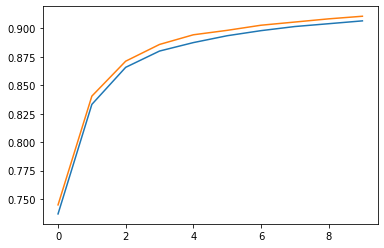

In [11]:
# 3. Plot train test acc over epochs
plt.plot(train_accs, label='Train accs.')
plt.plot(test_accs, label='Test accs.')

In [2]:
# 4. Try different hyperparameters out